In [2]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])

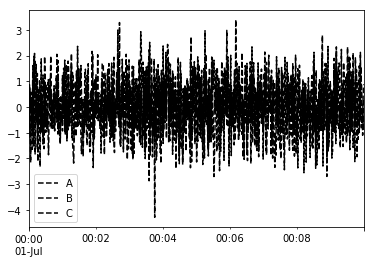

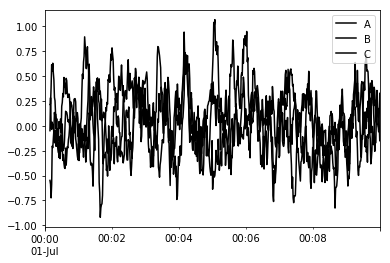

In [7]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [8]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

/home/pizzle/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  from ipykernel import kernelapp as app


,A,B,C
2016-07-01 00:00:01,0.235416,-0.109198,0.188126
2016-07-01 00:00:02,-0.245884,0.110015,-0.126374
2016-07-01 00:00:03,-0.119039,0.024168,-0.740497
2016-07-01 00:00:04,-0.065695,0.164822,-0.660797
2016-07-01 00:00:05,-0.205941,0.024010,-0.435410
2016-07-01 00:00:06,-0.201043,-0.196773,-0.685091
2016-07-01 00:00:07,0.144030,0.008702,-0.762411
2016-07-01 00:00:08,0.061206,-0.263938,-0.571465
2016-07-01 00:00:09,0.386338,-0.028191,-0.551880


In [15]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [10]:
df.head()

,A,B,C,D
2016-06-06,1.208858,0.790495,-1.292205,0.071017
2016-06-07,0.320845,-1.598867,2.195654,-1.343686
2016-06-08,1.141048,2.558654,-0.977837,1.341121
2016-06-09,-0.794649,0.794050,1.194901,0.673489
2016-06-10,-1.528218,-0.454027,-0.670996,0.278872


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7e3b0d4d68>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f7e3b041a20>], dtype=object)

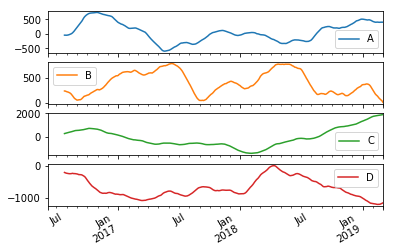

In [16]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,0.992054,0.517375,1.149618,0.729428


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,0.643335,1.615023,0.080386,0.833196
2016-06-08,0.434744,1.353287,0.597697,1.256532
2016-06-09,0.213614,1.040212,0.391905,1.438399
2016-06-10,0.108907,1.001984,0.347349,1.681355


# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
#It will provide a more stable statistic over time it will become less dependent on anamolies or extreme points because it is continuously weighted against previous data. 
# When might one vs. the other be appropriate?
#It might be more appropriate for analyzing data that exists over long periods like years, such as overall stock market indexes, when you expect data to regress to the mean. 

# EWMA
# Why use EWMA?
#It would be used to detect large movements in time-series data that may be short term in the scale of the data.

In [ ]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [ ]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting